In [1]:
include("init_libs.jl")
using LsqFit
const all_times = linspace(0, 150, 26)
const plot_xs = linspace(0, 150, 1000)
const ntimes = length(all_times);

In [2]:
params, ratios, uncs = NaCsData.calc_survival("data/na_multi_rabi.csv")
params_total, ratios_total, uncs_total = NaCsData.calc_survival("data/na_multi_rabi_total.csv")
ratios = ratios[:, 2]
uncs = uncs[:, 2]
ratios_total = ratios_total[:, 2]
uncs_total = uncs_total[:, 2];

In [3]:
function get_nth_data(data, n, scale)
    data[((n - 1) * ntimes + 1):(n * ntimes)] ./ scale
end

ratios1 = get_nth_data(ratios, 1, ratios_total[1])
uncs1 = get_nth_data(uncs, 1, ratios_total[1])
ratios2 = get_nth_data(ratios, 2, ratios_total[1])
uncs2 = get_nth_data(uncs, 2, ratios_total[1])
ratios3 = get_nth_data(ratios, 3, ratios_total[1])
uncs3 = get_nth_data(uncs, 3, ratios_total[1])

ratios4 = get_nth_data(ratios, 4, ratios_total[2])
uncs4 = get_nth_data(uncs, 4, ratios_total[2])
ratios5 = get_nth_data(ratios, 5, ratios_total[2])
uncs5 = get_nth_data(uncs, 5, ratios_total[2])
ratios6 = get_nth_data(ratios, 6, ratios_total[2])
uncs6 = get_nth_data(uncs, 6, ratios_total[2]);

In [4]:
function model_helper(η1, Δn2, x, nbar1, nbar2, η2, xscale, yscale)
    t = x[1]
    Δn1 = x[2]
    return yscale * Trap.thermal_sideband((nbar1, nbar2), t / xscale,
                                          (η1, η2), (Δn1, Δn2))
end

function get_model(η1, Δn2)
    function model(x, p)
        return model_helper.(η1, Δn2, x, p[1], p[2], p[3], p[4], p[5])
    end
end;

In [5]:
model0_34 = get_model(0.34, 0);
model1_34 = get_model(0.34, 1);

In [6]:
xs = [tuple.(all_times, fill(0, ntimes));
      tuple.(all_times, fill(-1, ntimes));
      tuple.(all_times, fill(-2, ntimes))];
ys = [ratios1; ratios2; ratios3];
ys2 = [ratios4; ratios5; ratios6];

In [7]:
fit = curve_fit(model0_34, xs, ys, [1.0, 30.0, 0.05, 6.2, 0.88])
@show fit.param, estimate_errors(fit);

(fit.param,estimate_errors(fit)) = ([1.00001,71.6319,0.082082,6.19105,0.883854],[0.000502483,2426.85,1.37664,0.35347,0.107081])

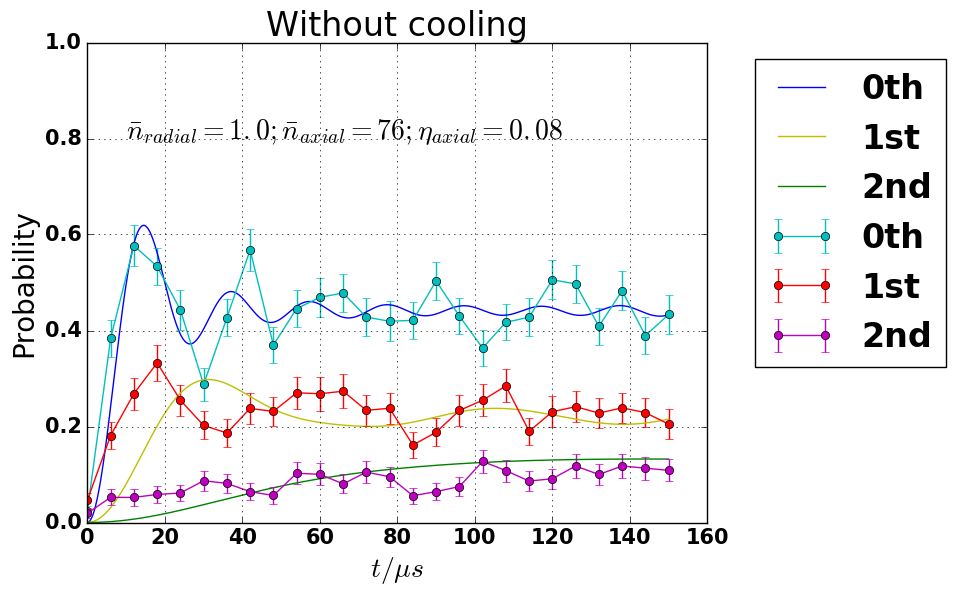

In [8]:
params = fit.param;
plot_ys = model0_34(tuple.(plot_xs, fill(0, length(plot_xs))), params)
plot(plot_xs, plot_ys, "b-", label="0th")
errorbar(all_times, ratios1, uncs1, fmt="co-", label="0th");
plot_ys = model0_34(tuple.(plot_xs, fill(-1, length(plot_xs))), params)
plot(plot_xs, plot_ys, "y-", label="1st")
errorbar(all_times, ratios2, uncs2, fmt="ro-", label="1st");
plot_ys = model0_34(tuple.(plot_xs, fill(-2, length(plot_xs))), params)
plot(plot_xs, plot_ys, "g-", label="2nd")
errorbar(all_times, ratios3, uncs3, fmt="mo-", label="2nd")
ylim([0, 1])
grid()
xlabel("\$t/\\mu s\$")
ylabel("Probability")
title("Without cooling")
legend(bbox_to_anchor=(1.05, 1), loc=2)
text(10, 0.8, "\$\\bar n_{radial}=1.0; \\bar n_{axial}=76; \\eta_{axial}=0.08\$")
savefig("imgs/na_multi_rabi_without_cool_fit.png",
        bbox_inches="tight", transparent=true)
nothing

In [9]:
fit2 = curve_fit(model0_34, xs, ys2, [1.0, 30.0, 0.05, 6.2, 0.88])
@show fit2.param, estimate_errors(fit2);

(fit2.param,estimate_errors(fit2)) = ([0.478266,107.999,0.0436808,6.32095,0.759401],[0.0762064,21.5026,0.00814753,0.130122,0.0501425])


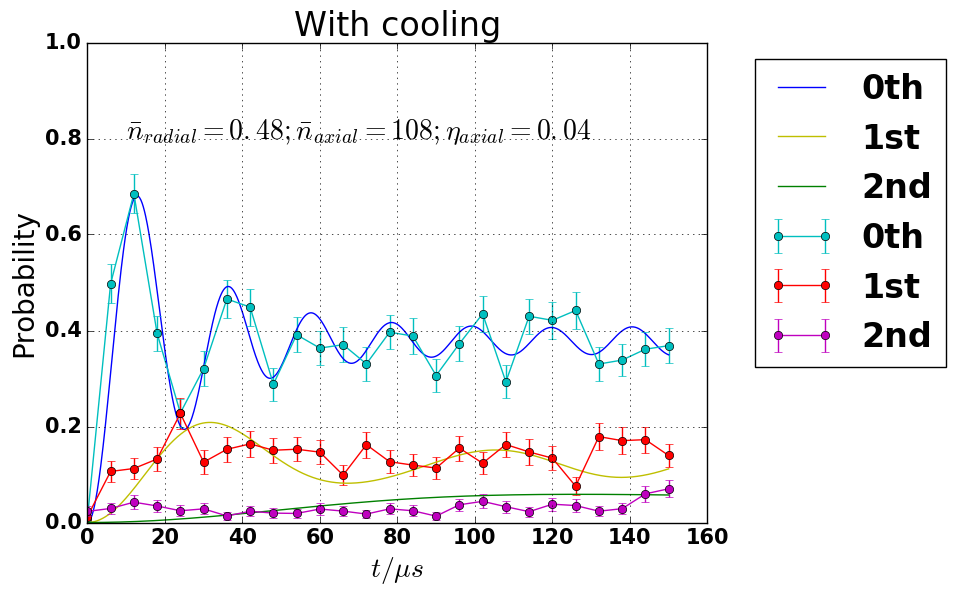

In [10]:
params = fit2.param;
plot_ys = model0_34(tuple.(plot_xs, fill(0, length(plot_xs))), params)
plot(plot_xs, plot_ys, "b-", label="0th")
errorbar(all_times, ratios4, uncs4, fmt="co-", label="0th");
plot_ys = model0_34(tuple.(plot_xs, fill(-1, length(plot_xs))), params)
plot(plot_xs, plot_ys, "y-", label="1st")
errorbar(all_times, ratios5, uncs5, fmt="ro-", label="1st");
plot_ys = model0_34(tuple.(plot_xs, fill(-2, length(plot_xs))), params)
plot(plot_xs, plot_ys, "g-", label="2nd")
errorbar(all_times, ratios6, uncs6, fmt="mo-", label="2nd")
ylim([0, 1])
grid()
xlabel("\$t/\\mu s\$")
ylabel("Probability")
title("With cooling")
legend(bbox_to_anchor=(1.05, 1), loc=2)
text(10, 0.8, "\$\\bar n_{radial}=0.48; \\bar n_{axial}=108; \\eta_{axial}=0.04\$")
savefig("imgs/na_multi_rabi_with_cool_fit.png",
        bbox_inches="tight", transparent=true)
nothing